In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import warnings


In [28]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset
df = pd.read_csv('data/phone.csv')

# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Remove rows where 'brand' is 'undefined'
df = df.drop(df[df['brand'] == 'undefined'].index)

# Select numerical and object columns
df_num = df.select_dtypes(include=['number'])
df_str = df.select_dtypes(include=['object'])

# Print the shape of the dataframe and check for null values
print(df.shape)
print(df.isnull().sum())

(1997, 11)
battery_power    0
clock_speed      0
ram              0
n_cores          0
use_time         0
px_width         0
px_height        0
brand            0
5g               0
grade            0
price            0
dtype: int64


# Nomor 1

In [39]:
## mean
for column in df_num.columns:
  print("Rata-rata kolom", column, "adalah", np.mean(df[column]))
print()

## median
for column in df_num.columns:
  print("Median kolom", column, "adalah", np.median(df[column]))
print()

## modus (kayanya modus gabisa kasi insight apapun dah, ntar tanya asisten aja perlu ato nggak)
for column in df_num.columns:
  mode = stats.mode(df[column])
  print("Modus kolom", column, "adalah", mode.mode, "dengan kemunculan sebanyak", mode.count)
print()

## standar deviasi
for column in df_num.columns:
  print("Standar deviasi kolom", column, "adalah", np.std(df[column]))
print()

## variansi
for column in df_num.columns:
  print("Variansi kolom", column, "adalah", np.var(df[column]))
print()

## range
for column in df_num.columns:
  print("Range kolom", column, "adalah", np.ptp(df[column]))
print()

## min dan max
for column in df_num.columns:
  print("Nilai minimum kolom", column, "adalah", np.min(df[column]), "dan maksimumnya adalah", np.max(df[column]))
print()

# kuartil
for column in df_num.columns:
  arr = df[column]
  print("Kuartil 1, 2, dan 3 dari kolom ", column, " secara berurutan adalah ", np.percentile(arr, 25), ", ", np.percentile(arr,50), ", dan ", np.percentile(arr,75), sep="")
print()

## IQR
IQR = {}
for column in df_num.columns:
  IQR[column] = np.percentile(df[column], 75) - np.percentile(df[column], 25)
  print("IQR kolom", column, "adalah", IQR[column])
print()

## skewness
for column in df_num.columns:
  print("Skewness kolom", column, "adalah", stats.skew(df[column]))
print()

## kurtosis
for column in df_num.columns:
  print("Kurtosis kolom", column, "adalah", stats.kurtosis(df[column]))
print()

Rata-rata kolom battery_power adalah 1920.7194820204913
Rata-rata kolom clock_speed adalah 1.102619140443319
Rata-rata kolom ram adalah 6.050618137704288
Rata-rata kolom n_cores adalah 12.044900346853634
Rata-rata kolom use_time adalah 8.044314239814794
Rata-rata kolom px_width adalah 728.7181415934301
Rata-rata kolom px_height adalah 1035.2930338166666
Rata-rata kolom 5g adalah 0.507073643909433
Rata-rata kolom price adalah 7966.659072188511

Median kolom battery_power adalah 1922.31441371664
Median kolom clock_speed adalah 1.1003787482436298
Median kolom ram adalah 6.017567326176749
Median kolom n_cores adalah 12.075190658608856
Median kolom use_time adalah 8.033358492162183
Median kolom px_width adalah 728.6537587453423
Median kolom px_height adalah 1035.3664748852443
Median kolom 5g adalah 0.5090156052906403
Median kolom price adalah 7983.680768804193

Modus kolom battery_power adalah 1420.9542711910349 dengan kemunculan sebanyak 1
Modus kolom clock_speed adalah 0.063078405199159 d

In [31]:
# DataFrame string
for column in df_str.columns:
  
  # Nilai unik
  print(f"Nilai unik untuk kolom '{column}':")
  print(df_str[column].unique())
  
  # Proporsi
  print("\nProporsi:")
  print(df_str[column].value_counts(normalize=True))
  print()

Nilai unik untuk kolom 'brand':
['appa' 'sumseng' 'oranye' 'largeyou']

Proporsi:
brand
sumseng     0.338007
oranye      0.239359
largeyou    0.212819
appa        0.209815
Name: proportion, dtype: float64

Nilai unik untuk kolom 'grade':
['B' 'C' 'A']

Proporsi:
grade
A    0.346019
B    0.341512
C    0.312469
Name: proportion, dtype: float64



# Nomor 2

In [32]:
# cek ada ato nggak outlier
for column in df_num.columns:
  
  # Hitung Q1, Q3, dan IQR
  lowerBound = np.percentile(df_num[column], 25) - 1.5 * IQR[column]
  upperBound = np.percentile(df_num[column], 75) + 1.5 * IQR[column]
    
  # Cetak outlier
  print("Outlier dari kolom", column, "adalah:")
  print(df_num[(df_num[column] < lowerBound) | (df_num[column] > upperBound)][column])
  print()

Outlier dari kolom battery_power adalah:
117     1553.766029
120     1493.397642
210     1563.639346
282     2289.251076
378     2307.072694
438     2401.957818
492     2289.348438
536     1525.842443
718     1566.283517
754     1557.530230
762     1488.948363
903     2363.451821
986     2331.185458
1005    1534.668853
1199    1420.954271
1206    1477.965749
1234    1550.042708
1319    1530.624039
1511    1522.055910
1575    1519.032034
1643    2321.463264
1685    2291.581698
1908    2281.544845
1948    2352.078882
1968    1506.515170
Name: battery_power, dtype: float64

Outlier dari kolom clock_speed adalah:
145     1.981452
186     1.954328
214     0.269403
290     0.256667
394     0.285339
506     1.917131
936     1.974235
1156    0.063078
1351    0.086511
1372    0.287064
1571    2.145640
1638    2.056815
1808    0.188163
1858    0.202770
1912    0.178785
Name: clock_speed, dtype: float64

Outlier dari kolom ram adalah:
27       0.473096
441     11.730657
494     12.147370
864     

In [33]:
# ngapus outlier
for column in df_num.columns:
  
    # Hitung Q1, Q3, dan IQR
  lowerBound = np.percentile(df_num[column], 25) - 1.5 * IQR[column]
  upperBound = np.percentile(df_num[column], 75) + 1.5 * IQR[column]

    # Hapus outlier
  length_before = len(df_num[column])
  df_num = df_num[(df_num[column] >= lowerBound) & (df_num[column] <= upperBound)]
  length_after = len(df_num[column])
    
    # Cetak panjang DataFrame sebelum dan sesudah penghapusan outlier
  print(f"Panjang DataFrame sebelum penghapusan outlier di kolom {column}:", length_before)
  print(f"Panjang DataFrame setelah penghapusan outlier di kolom {column}:", length_after)
  print()

Panjang DataFrame sebelum penghapusan outlier di kolom battery_power: 1997
Panjang DataFrame setelah penghapusan outlier di kolom battery_power: 1972

Panjang DataFrame sebelum penghapusan outlier di kolom clock_speed: 1972
Panjang DataFrame setelah penghapusan outlier di kolom clock_speed: 1956

Panjang DataFrame sebelum penghapusan outlier di kolom ram: 1956
Panjang DataFrame setelah penghapusan outlier di kolom ram: 1944

Panjang DataFrame sebelum penghapusan outlier di kolom n_cores: 1944
Panjang DataFrame setelah penghapusan outlier di kolom n_cores: 1929

Panjang DataFrame sebelum penghapusan outlier di kolom use_time: 1929
Panjang DataFrame setelah penghapusan outlier di kolom use_time: 1913

Panjang DataFrame sebelum penghapusan outlier di kolom px_width: 1913
Panjang DataFrame setelah penghapusan outlier di kolom px_width: 1896

Panjang DataFrame sebelum penghapusan outlier di kolom px_height: 1896
Panjang DataFrame setelah penghapusan outlier di kolom px_height: 1874

Panjang

# Nomor 3

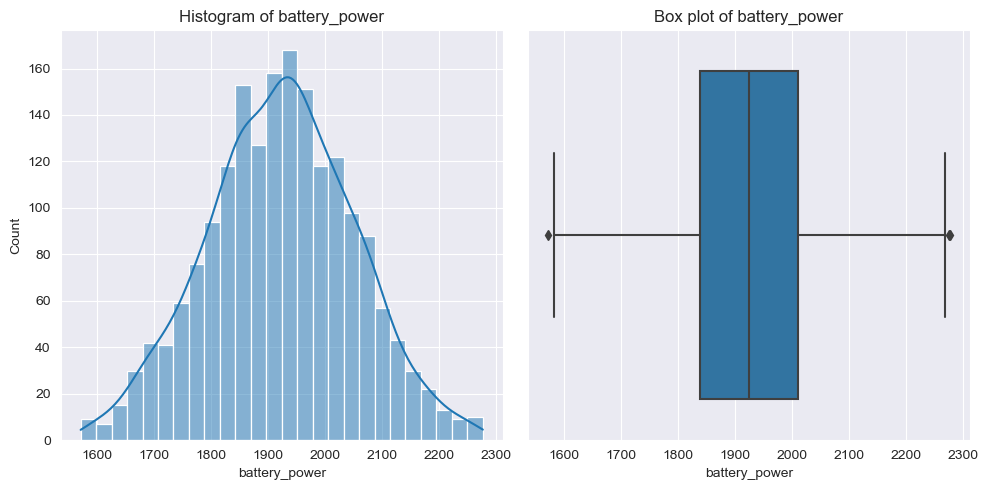

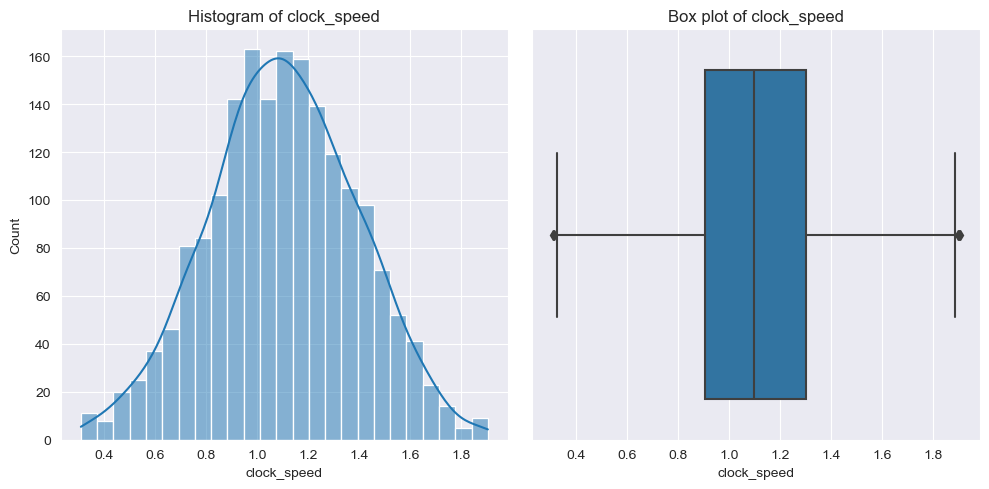

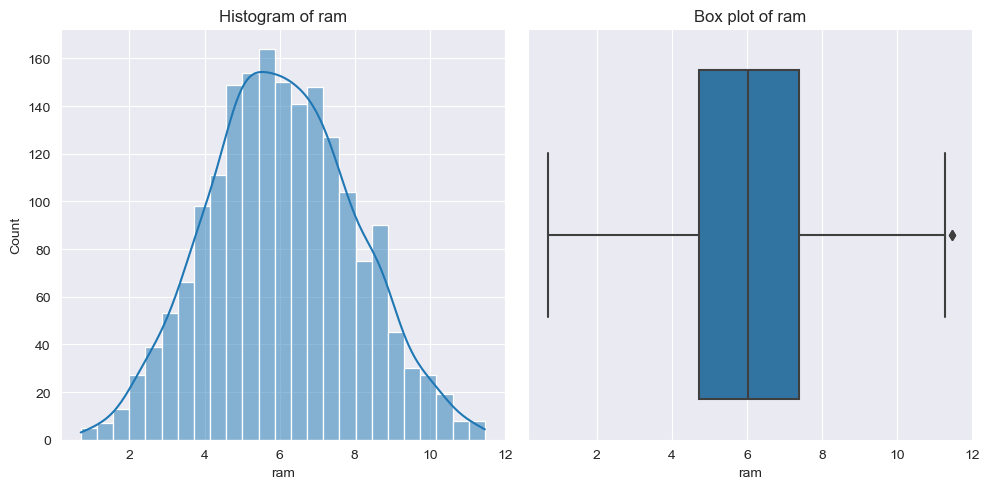

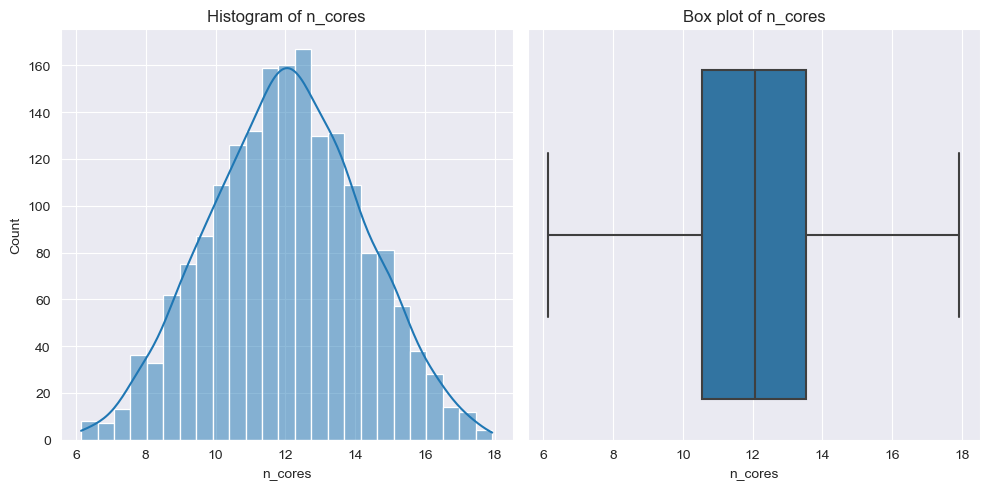

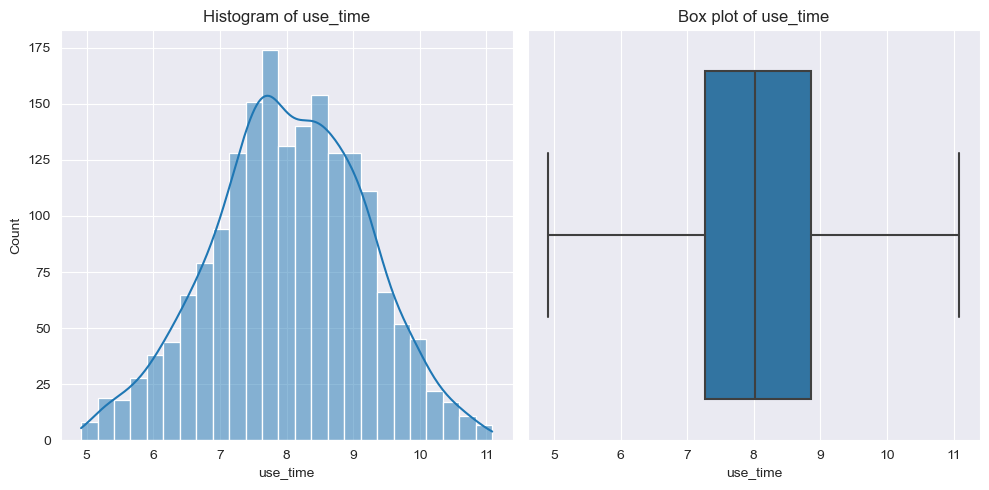

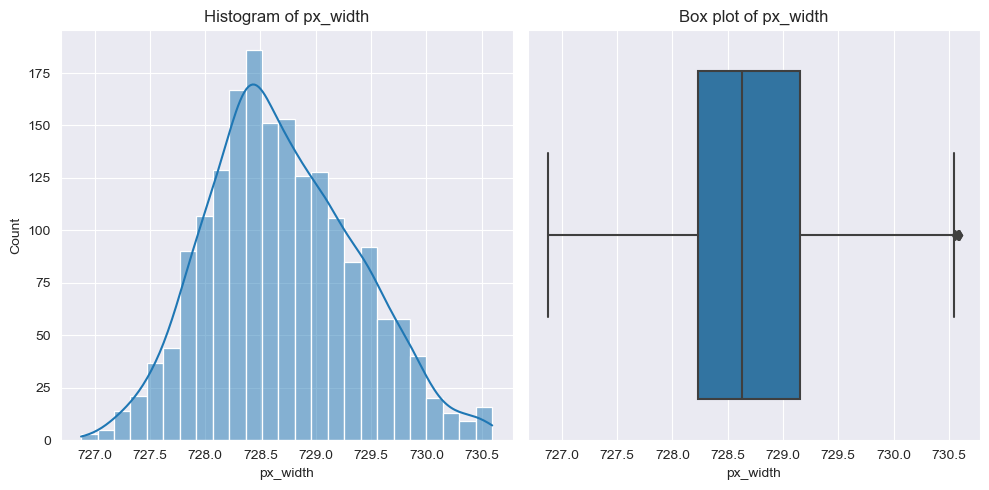

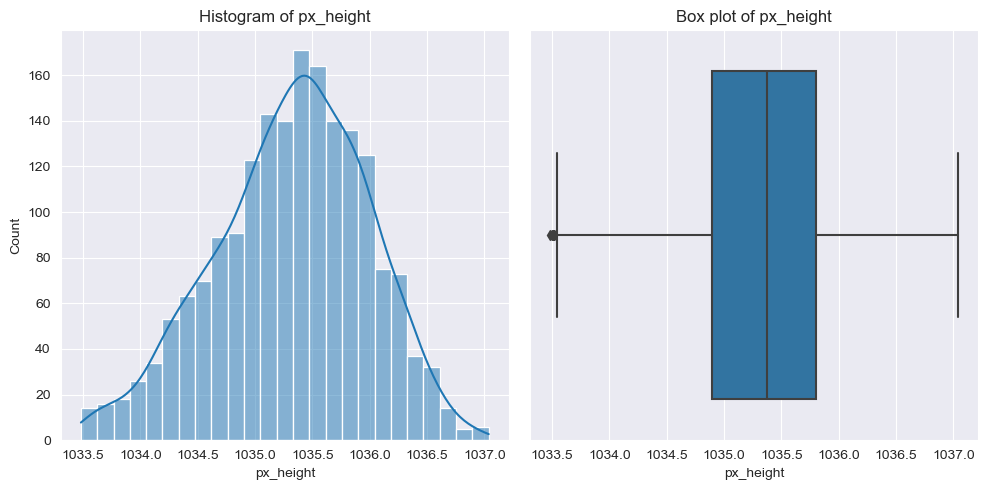

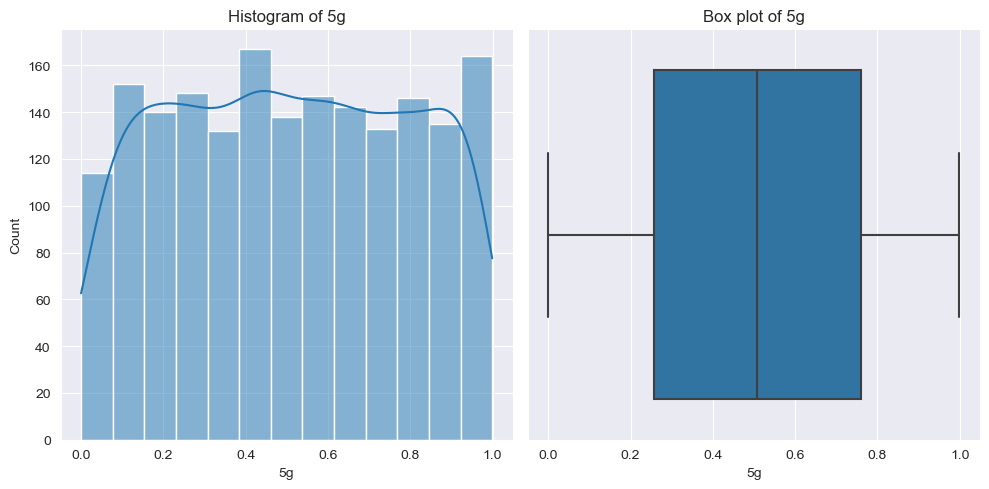

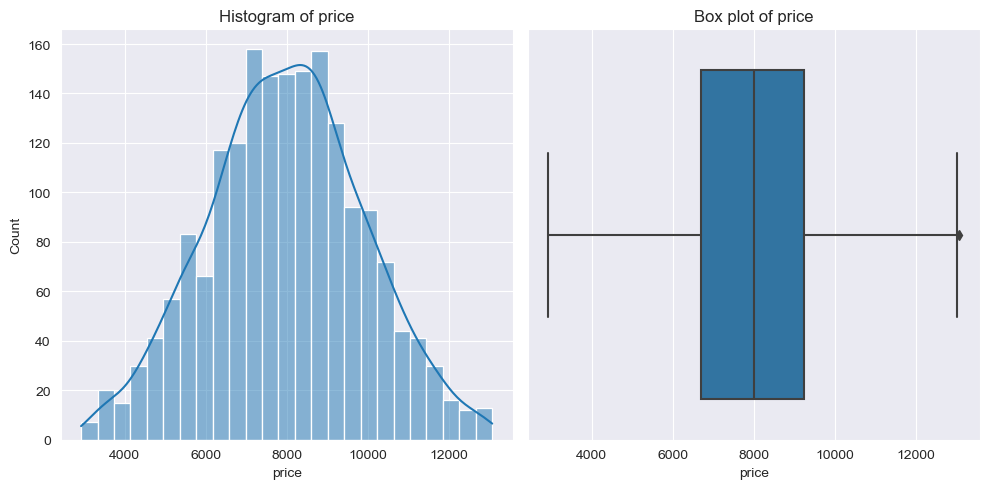

In [34]:
# DataFrame numerik
for col in df_num.columns:
  
  # Buat figure
  plt.figure(figsize=(10, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df_num[col], kde=True)
  plt.title(f'Histogram of {col}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_num[col], orient='h')
  plt.title(f'Box plot of {col}')

  # Tampilkan plot
  plt.tight_layout()
  plt.show()

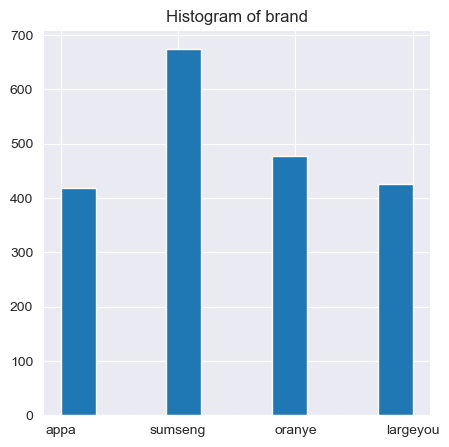

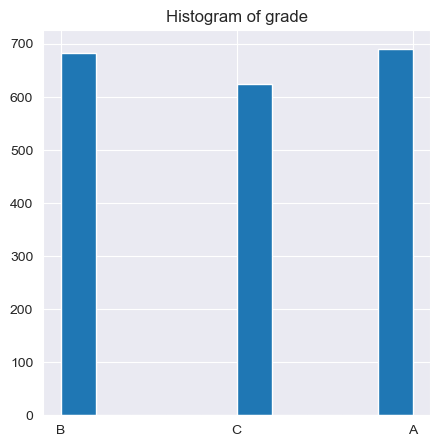

In [35]:
# DataFrame string
for col in df_str.columns:
  # Buat figure
  plt.figure(figsize=(5, 5))

  # Histogram
  plt.hist(df_str[col], bins=10)
  plt.title(f'Histogram of {col}')

  # Tampilkan plot
  plt.show()

# Nomor 4

In [36]:
for column in df_num.columns:
  
  # Uji normalitas
  stat, p = shapiro(df_num[column])
  alpha = 0.05
  
  # Cetak hasil uji normalitas
  if p > alpha:
      print(f'Kolom {column} terdistribusi normal')
  else:
      print(f'Kolom {column} tidak terdistribusi normal')

Kolom battery_power tidak terdistribusi normal
Kolom clock_speed terdistribusi normal
Kolom ram tidak terdistribusi normal
Kolom n_cores tidak terdistribusi normal
Kolom use_time tidak terdistribusi normal
Kolom px_width tidak terdistribusi normal
Kolom px_height tidak terdistribusi normal
Kolom 5g tidak terdistribusi normal
Kolom price tidak terdistribusi normal


# Nomor 5